# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [190]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [198]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

In [199]:
cities_pd = pd.DataFrame()
cities_pd['City'] = cities
cities_pd['Lat'] = ""
cities_pd['Lng'] = ""
cities_pd['Max Temp'] = ""
cities_pd['Humidity'] = ""
cities_pd['Cloudiness'] = ""
cities_pd['Wind Speed'] = ""
cities_pd['Country'] = ""
cities_pd['Date'] = ""
cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,,,,,,,,
1,punta arenas,,,,,,,,
2,zhaoyuan,,,,,,,,
3,new norfolk,,,,,,,,
4,bengkulu,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [205]:
# set up lists to hold reponse info

city = [] 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness= []
wind_speed = []
country = []
date = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key =  weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
    
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f'City ' + city + ' completed' )
        
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")

City yellowknife completed
City punta arenas completed
City zhaoyuan completed
City new norfolk completed
City bengkulu completed
City cherskiy completed
City port blair completed
City ribeira grande completed
City souillac completed
City ponta do sol completed
City ushuaia completed
City bethel completed
City longyearbyen completed
City hilo completed
City blora completed
City tricase completed
City ponta delgada completed
City abalak completed
City mataura completed
City not found. Skipping...
City not found. Skipping...
City bathsheba completed
City bredasdorp completed
City tuatapere completed
City jiuquan completed
City amapa completed
City seoul completed
City butaritari completed
City turukhansk completed
City port hedland completed
City not found. Skipping...
City chiavari completed
City castro completed
City not found. Skipping...
City port alfred completed
City saint george completed
City lompoc completed
City nanortalik completed
City not found. Skipping...
City batagay-alyt

City mount gambier completed
City norman wells completed
City tura completed
City bara completed
City sur completed
City pinillos completed
City ilulissat completed
City dyatkovo completed
City fortuna completed
City wewak completed
City not found. Skipping...
City bow island completed
City bacolod completed
City anton lizardo completed
City nizhneangarsk completed
City marystown completed
City ugoofaaru completed
City portland completed
City labuan completed
City not found. Skipping...
City saldanha completed
City el alto completed
City chateau-gontier completed
City avera completed
City sorrento completed
City san cristobal completed
City not found. Skipping...
City bolbec completed
City faya completed
City brae completed
City hailar completed
City ibra completed
City hue completed
City saskylakh completed
City baghdad completed
City kushiro completed
City gavle completed
City abu zabad completed
City mombaca completed
City not found. Skipping...
City garut completed
City port moresb

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [206]:
# Visualize to confirm airport data appears
cities_dict = ({"City":cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

cities_dict_df = pd.DataFrame.from_dict(dict, orient='index').transpose()
dict_df.head()

# Save Data to csv
cities_dict_df.to_csv("WeatherPy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [207]:
cities_dict_df["Humidity"].max()

100

In [211]:
#  Get the indices of cities that have humidity over 100%.

hum_cities = cities_dict_df.loc[cities_dict_df['Humidity'] >= 100,:]
hum_cities.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
31,busselton,66.1451,-65.7125,-1,100,90,4.12,CA,1619734757
59,port hueneme,-21.2,-175.2,24,100,90,3.09,TO,1619734768
78,carupano,42.097,-79.2353,11.67,100,90,3.09,US,1619734777
92,avarua,46.6166,10.7002,13,100,90,0.73,IT,1619734783
137,uzhur,-42.8794,147.329,12.22,100,75,4.12,AU,1619734753


In [214]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
print("No City over 100% Humidity")

No City over 100% Humidity


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

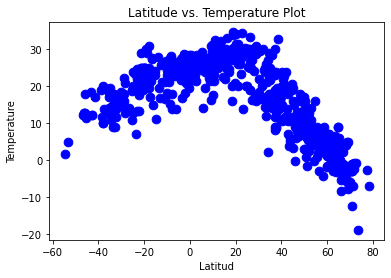

In [215]:
marker_size=15
plt.scatter(cities_dict_df['Lat'],cities_dict_df['Max Temp'],s=75, color="blue")
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitud")
plt.ylabel("Temperature")


plt.savefig("../Images/Latitude vs. Temperature Plot.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Humidity Plot

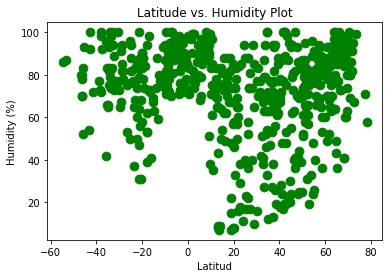

In [217]:
marker_size=15
plt.scatter(cities_dict_df['Lat'],cities_dict_df['Humidity'],s=75, color="green")
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitud")
plt.ylabel("Humidity (%)")


plt.savefig("../Images/Latitude vs. Humidity Plot.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Cloudiness Plot

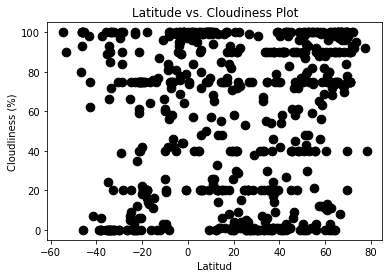

In [218]:
marker_size=15
plt.scatter(cities_dict_df['Lat'],cities_dict_df['Cloudiness'],s=75, color="black")
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitud")
plt.ylabel("Cloudliness (%)")


plt.savefig("../Images/Latitude vs. Cloudliness.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Wind Speed Plot

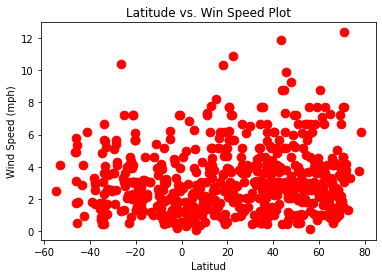

In [220]:
marker_size=15
plt.scatter(cities_dict_df['Lat'],cities_dict_df['Wind Speed'],s=75, color="red")
plt.title("Latitude vs. Win Speed Plot")
plt.xlabel("Latitud")
plt.ylabel("Wind Speed (mph)")


plt.savefig("../Images/Latitude vs. Wind Speed Plot.png", bbox_inches = "tight")
plt.show()

## Linear Regression

In [221]:
cities_dict_df["Lat"] = cities_dict_df["Lat"].astype(float)
cities_dict_df["Lng"] = cities_dict_df["Lng"].astype(float)
cities_dict_df["Max Temp"] = cities_dict_df["Max Temp"].astype(float)
cities_dict_df["Humidity"] = cities_dict_df["Humidity"].astype(float)
cities_dict_df["Cloudiness"] = cities_dict_df["Cloudiness"].astype(float)
cities_dict_df["Wind Speed"] = cities_dict_df["Wind Speed"].astype(float)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [222]:
northern_df = cities_dict_df.loc[cities_dict_df['Lat'] > 0,:]
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,40.5982,-124.1573,18.89,72.0,1.0,6.17,US,1619734744
5,abonnema,4.7084,6.7931,27.00,89.0,40.0,2.06,NG,1619734746
6,grand centre,69.4541,-133.0374,-3.00,63.0,20.0,7.20,CA,1619734747
7,tuktoyaktuk,48.6814,71.6433,11.69,69.0,100.0,5.96,KZ,1619734747
9,punta arenas,42.6001,-73.9662,13.89,89.0,100.0,1.69,US,1619734729


In [223]:
northern_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

The correlation between Latitude and Max Temp is -0.89
The r-squared is: 0.788833549667221


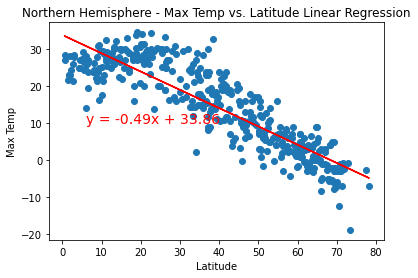

In [242]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Max Temp"])[0],2)
print(f"The correlation between Latitude and Max Temp is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [225]:
southern_df = cities_dict_df.loc[cities_dict_df['Lat'] < 0,:]
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,geraldton,-28.7667,114.6000,18.00,82.0,90.0,5.66,AU,1619734744
2,puerto ayora,-0.7393,-90.3518,27.00,78.0,20.0,7.20,EC,1619734745
3,saint-philippe,-21.3585,55.7679,25.00,83.0,75.0,7.20,RE,1619734745
4,castro,-24.7911,-50.0119,12.65,82.0,9.0,2.81,BR,1619734746
8,atasu,-53.1500,-70.9167,5.00,87.0,90.0,4.12,CL,1619734748


In [226]:
southern_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object

The correlation between Latitude and Max Temp is 0.72
The r-squared is: 0.5127301151281647


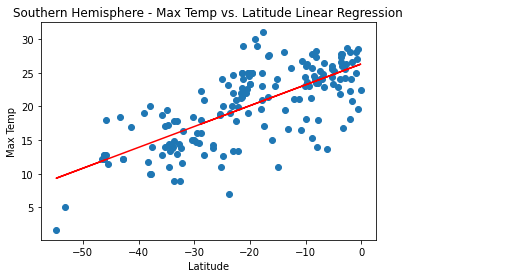

In [241]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Max Temp"])[0],2)
print(f"The correlation between Latitude and Max Temp is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity(%) is 0.11
The r-squared is: 0.012399640536340335


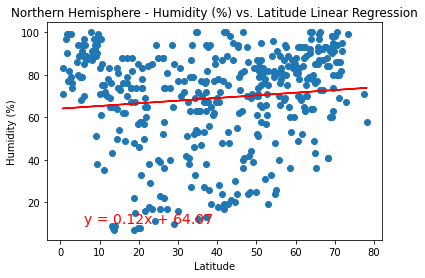

In [240]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Humidity"])[0],2)
print(f"The correlation between Latitude and Humidity(%) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between Latitude and Humidity(%) is 0.12
The r-squared is: 0.015544291156671603


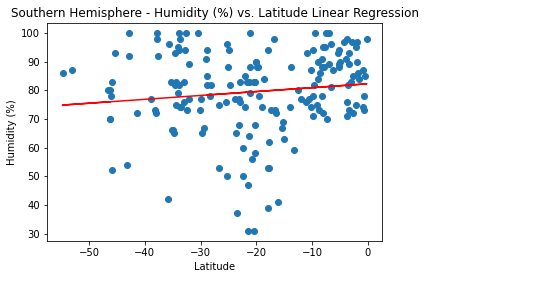

In [239]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Humidity"])[0],2)
print(f"The correlation between Latitude and Humidity(%) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness(%) is 0.18
The r-squared is: 0.033829478977449076


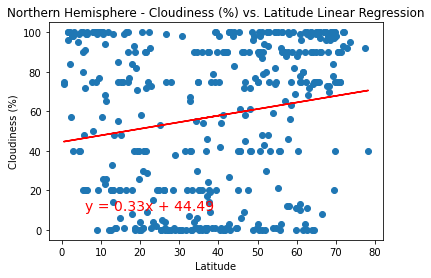

In [238]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Cloudiness"])[0],2)
print(f"The correlation between Latitude and Cloudiness(%) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between Latitude and Cloudiness(%) is 0.16
The r-squared is: 0.024362985683656142


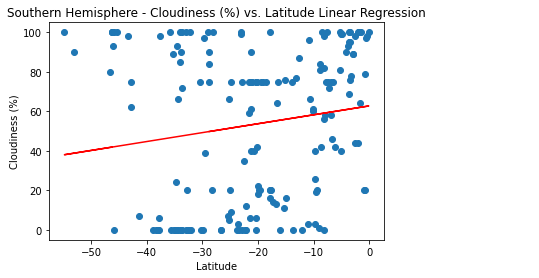

In [237]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Cloudiness"])[0],2)
print(f"The correlation between Latitude and Cloudiness(%) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed(mph) is 0.07
The r-squared is: 0.004673497132121191


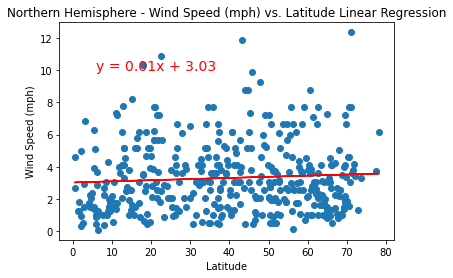

In [236]:
correlation=round(st.pearsonr(northern_df["Lat"], northern_df["Wind Speed"])[0],2)
print(f"The correlation between Latitude and Wind Speed(mph) is {correlation}")

x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between Latitude and Wind Speed(mph) is -0.14
The r-squared is: 0.019538377636807432


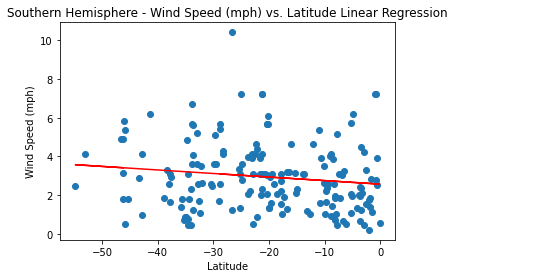

In [235]:
correlation=round(st.pearsonr(southern_df["Lat"], southern_df["Wind Speed"])[0],2)
print(f"The correlation between Latitude and Wind Speed(mph) is {correlation}")

x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png", bbox_inches = "tight")
plt.show()